<a href="https://colab.research.google.com/github/Amir-Youssef/PAD-PrevDemanda/blob/main/Modelo_PAD_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/BIA /3Período /PAD/Dados Tratados/treino_final.csv')
display(df)

,Id,tipo_moradia,localizacao,andares,nota_casa,ano_contrucao,preco,vagas_garagem,cozinhas,banheiros,tamanho(em pés quadrados),tamanho lote
0,1,Densidade Residencial Baixa,College Creek,2,5,2003,208500,2,1,4,1710,8450
1,2,Densidade Residencial Baixa,Veenker,1,8,1976,181500,2,1,3,1262,9600
2,3,Densidade Residencial Baixa,College Creek,2,5,2001,223500,2,1,4,1786,11250
3,4,Densidade Residencial Baixa,Crawford,2,5,1915,140000,3,1,2,1717,9550
4,5,Densidade Residencial Baixa,Northridge,2,5,2000,250000,3,1,4,2198,14260
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,Densidade Residencial Baixa,Gilbert,2,5,1999,175000,2,1,3,1647,7917
1456,1457,Densidade Residencial Baixa,Northwest Ames,1,6,1978,210000,2,1,3,2073,13175
1457,1458,Densidade Residencial Baixa,Crawford,2,9,1941,266500,1,1,2,2340,9042
1458,1459,Densidade Residencial Baixa,NAmes,1,6,1950,142125,1,1,2,1078,9717


# Correlação

In [ ]:
correlacao = df.corr()
correlacao

<ipython-input-600-ee2e201a8fee>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = df.corr()


,Id,andares,nota_casa,ano_contrucao,preco,vagas_garagem,cozinhas,banheiros,tamanho(em pés quadrados),tamanho lote
Id,1.000000,0.011734,0.012609,-0.012713,-0.021917,0.016570,0.002951,0.003105,0.008273,-0.033226
andares,0.011734,1.000000,0.093219,-0.123255,0.061811,0.005376,0.036157,0.302658,0.391650,-0.012717
nota_casa,0.012609,0.093219,1.000000,-0.375983,-0.077856,-0.185758,-0.087001,-0.149461,-0.079686,-0.005636
ano_contrucao,-0.012713,-0.123255,-0.375983,1.000000,0.522897,0.537850,-0.174800,0.507498,0.199010,0.014228
preco,-0.021917,0.061811,-0.077856,0.522897,1.000000,0.640409,-0.135907,0.613005,0.708624,0.263843
vagas_garagem,0.016570,0.005376,-0.185758,0.537850,0.640409,1.000000,-0.050634,0.468671,0.467247,0.154871
cozinhas,0.002951,0.036157,-0.087001,-0.174800,-0.135907,-0.050634,1.000000,0.009117,0.100063,-0.017784
banheiros,0.003105,0.302658,-0.149461,0.507498,0.613005,0.468671,0.009117,1.000000,0.617494,0.184407
tamanho(em pés quadrados),0.008273,0.391650,-0.079686,0.199010,0.708624,0.467247,0.100063,0.617494,1.000000,0.263116
tamanho lote,-0.033226,-0.012717,-0.005636,0.014228,0.263843,0.154871,-0.017784,0.184407,0.263116,1.000000


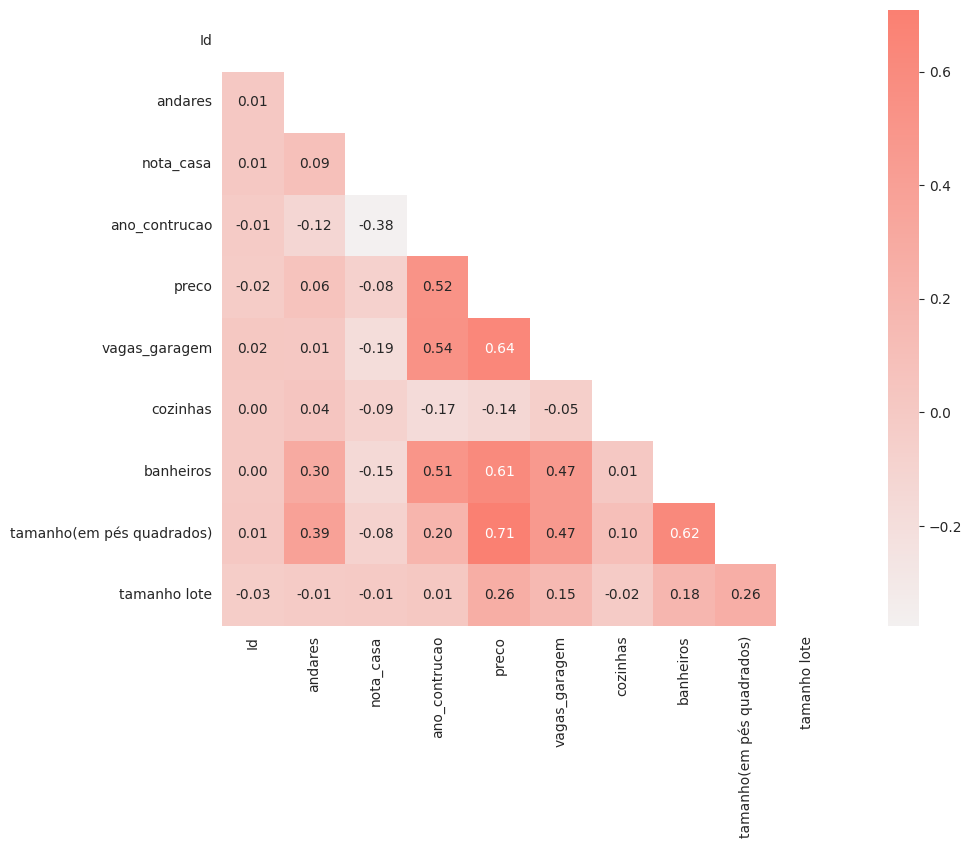

In [ ]:
# Visualização das correlações

cores = sns.color_palette('light:salmon', as_cmap=True)
mask = np.zeros_like(correlacao)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(13, 8))
    ax = sns.heatmap(correlacao, cmap=cores, mask=mask, square=True, fmt='.2f', annot=True)


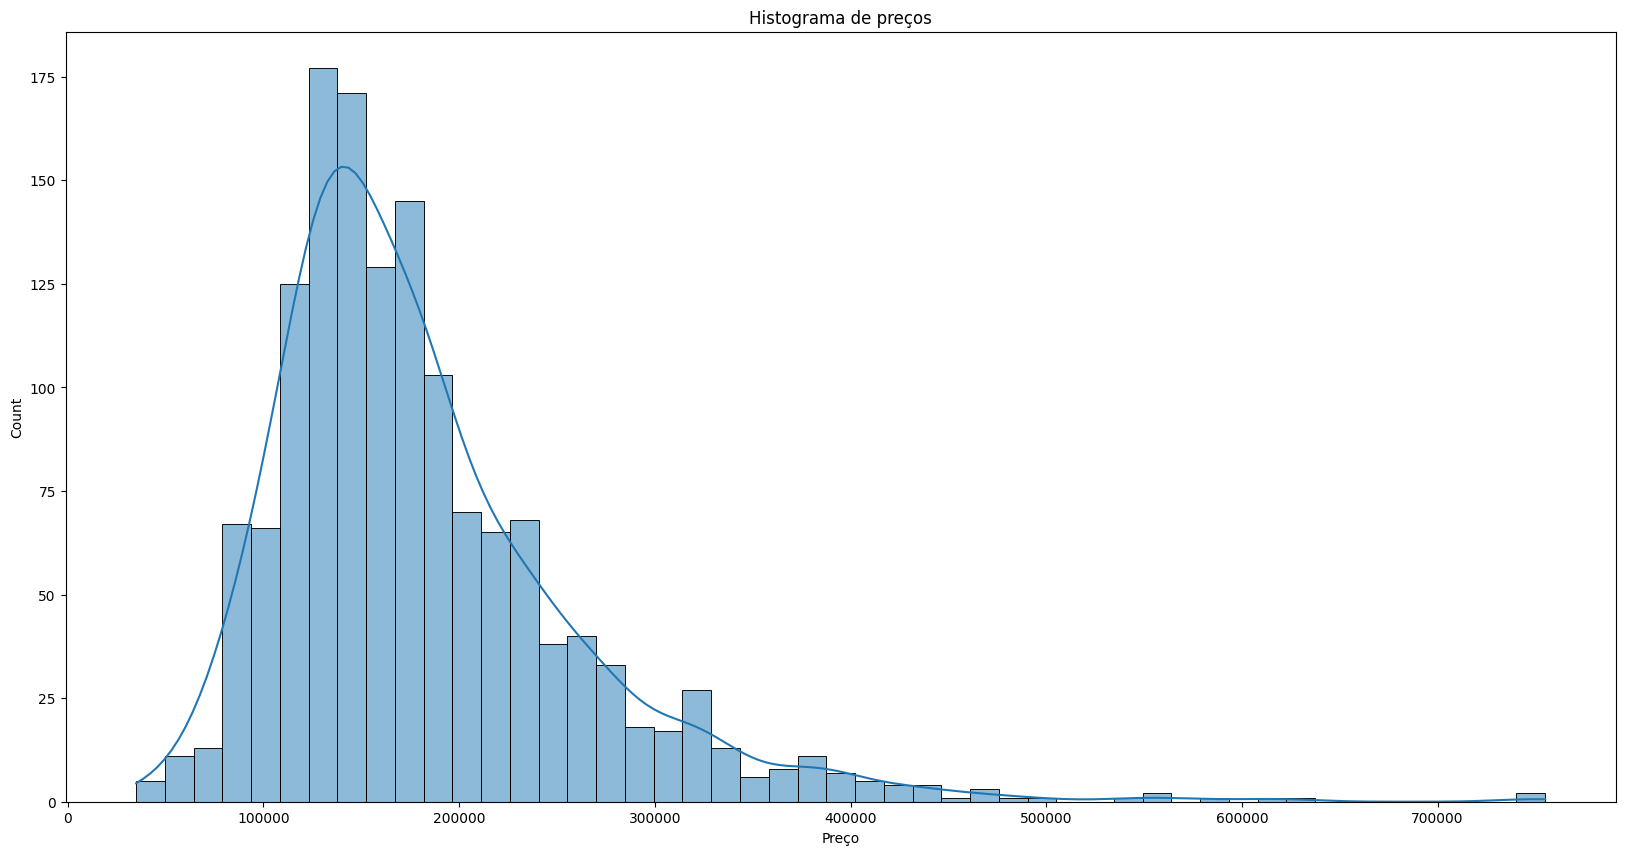

In [ ]:
# Antes (distribuição assimetrica a direita)

ax = sns.histplot(data=df, x='preco', kde=True)
ax.figure.set_size_inches(20, 10)
ax.set_title('Histograma de preços')
ax.set_xlabel('Preço');

# Transformação das variáveis

In [ ]:
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p, validate=True)
dados_transformados = transformer.transform(df.select_dtypes(exclude=['object']))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


In [ ]:
colunas_dados_transformados = df.select_dtypes(exclude=['object']).columns

df_transformado = pd.concat([df.select_dtypes(include=['object']), pd.DataFrame(dados_transformados, columns=colunas_dados_transformados)], axis=1)
df_transformado.head()

,tipo_moradia,localizacao,Id,andares,nota_casa,ano_contrucao,preco,vagas_garagem,cozinhas,banheiros,tamanho(em pés quadrados),tamanho lote
0,Densidade Residencial Baixa,College Creek,0.693147,1.098612,1.791759,7.602900,12.247699,1.098612,0.693147,1.609438,7.444833,9.042040
1,Densidade Residencial Baixa,Veenker,1.098612,0.693147,2.197225,7.589336,12.109016,1.098612,0.693147,1.386294,7.141245,9.169623
2,Densidade Residencial Baixa,College Creek,1.386294,1.098612,1.791759,7.601902,12.317171,1.098612,0.693147,1.609438,7.488294,9.328212
3,Densidade Residencial Baixa,Crawford,1.609438,1.098612,1.791759,7.557995,11.849405,1.386294,0.693147,1.098612,7.448916,9.164401
4,Densidade Residencial Baixa,Northridge,1.791759,1.098612,1.791759,7.601402,12.429220,1.386294,0.693147,1.609438,7.695758,9.565284


<ipython-input-480-eef08827dbe3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao_transformado = df_transformado.corr()


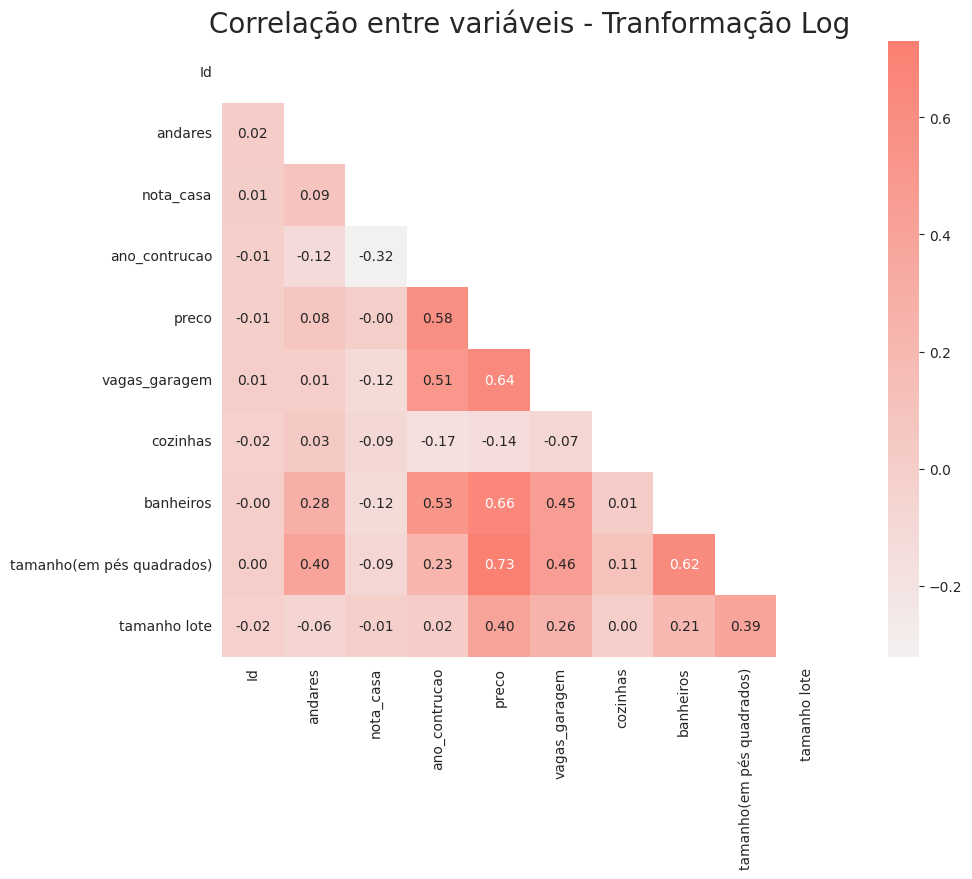

In [ ]:
# Depois da transformação

correlacao_transformado = df_transformado.corr()
mask = np.zeros_like(correlacao_transformado)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(13, 8))
    ax = sns.heatmap(correlacao_transformado, cmap=cores, mask=mask, square=True, fmt='.2f', annot=True)
    ax.set_title('Correlação entre variáveis - Tranformação Log', fontsize=20)

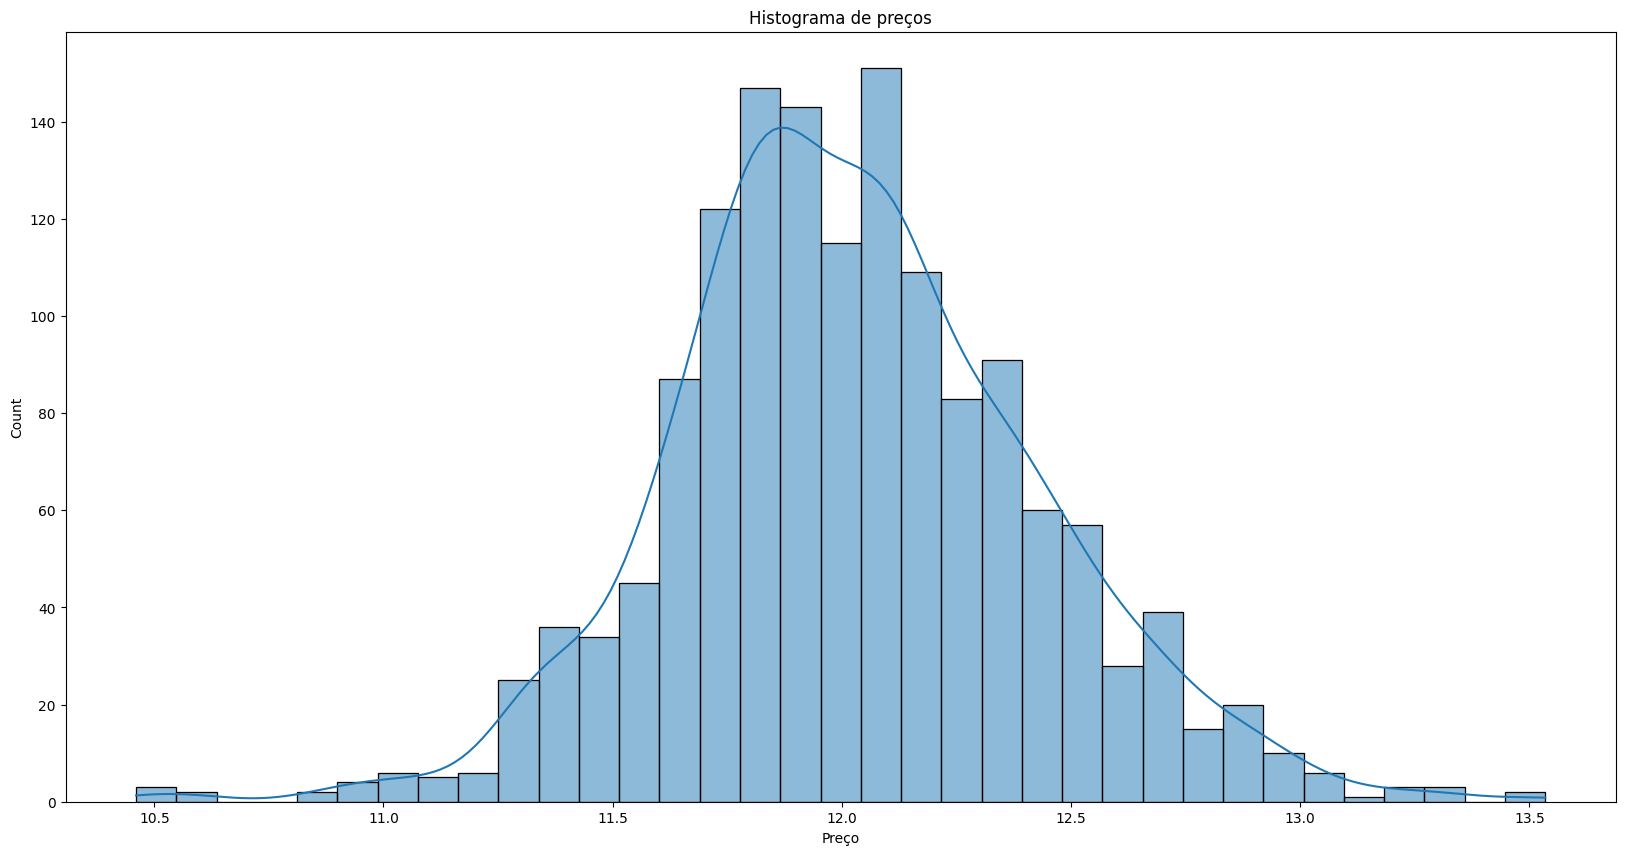

In [ ]:
# Depois (distribuiçao simétrica)

ax = sns.histplot(data=df_transformado, x='preco', kde=True)
ax.figure.set_size_inches(20, 10)
ax.set_title('Histograma de preços')
ax.set_xlabel('Preço');

# Dummies


In [ ]:
variaveis_categoricas = df_transformado.select_dtypes(include=['object']).columns

In [ ]:
variaveis_categoricas

Index(['tipo_moradia', 'localizacao'], dtype='object')

In [ ]:
df_dummies = pd.get_dummies(df_transformado[variaveis_categoricas])
df_dummies.head()

,tipo_moradia_C (all),tipo_moradia_Densidade Residencial Alta,tipo_moradia_Densidade Residencial Baixa,tipo_moradia_Densidade Residencial Média,tipo_moradia_Área Residencial de Vilas Flutuantes,localizacao_Bloomington Heights,localizacao_Bluestem,localizacao_Briardale,localizacao_Brookside,localizacao_Clear Creek,...,localizacao_Northridge Heights,localizacao_Northwest Ames,localizacao_Old Town,localizacao_Sawyer,localizacao_Sawyer West,localizacao_Somerset,localizacao_South & West of Iowa State University,localizacao_Stone Brook,localizacao_Timberland,localizacao_Veenker
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dados_imoveis_dummies = pd.concat([df_transformado.drop(variaveis_categoricas, axis=1), df_dummies], axis=1)
dados_imoveis_dummies.head()

,Id,andares,nota_casa,ano_contrucao,preco,vagas_garagem,cozinhas,banheiros,tamanho(em pés quadrados),tamanho lote,...,localizacao_Northridge Heights,localizacao_Northwest Ames,localizacao_Old Town,localizacao_Sawyer,localizacao_Sawyer West,localizacao_Somerset,localizacao_South & West of Iowa State University,localizacao_Stone Brook,localizacao_Timberland,localizacao_Veenker
0,0.693147,1.098612,1.791759,7.602900,12.247699,1.098612,0.693147,1.609438,7.444833,9.042040,...,0,0,0,0,0,0,0,0,0,0
1,1.098612,0.693147,2.197225,7.589336,12.109016,1.098612,0.693147,1.386294,7.141245,9.169623,...,0,0,0,0,0,0,0,0,0,1
2,1.386294,1.098612,1.791759,7.601902,12.317171,1.098612,0.693147,1.609438,7.488294,9.328212,...,0,0,0,0,0,0,0,0,0,0
3,1.609438,1.098612,1.791759,7.557995,11.849405,1.386294,0.693147,1.098612,7.448916,9.164401,...,0,0,0,0,0,0,0,0,0,0
4,1.791759,1.098612,1.791759,7.601402,12.429220,1.386294,0.693147,1.609438,7.695758,9.565284,...,0,0,0,0,0,0,0,0,0,0


# Divisão dos dados



In [ ]:
#Variáveis explanatórias(features)
X = dados_imoveis_dummies.drop('preco', axis=1)

#Variável dependente (target)
y = dados_imoveis_dummies['preco']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Divisão em conjunto de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.metrics import r2_score

# Previsão Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(random_state=42, max_depth=5, n_estimators=10)

In [ ]:
rf.fit(X_treino, y_treino)

RandomForestRegressor(max_depth=5, n_estimators=10, random_state=42)

In [ ]:
previsao_rf = rf.predict(X_teste)

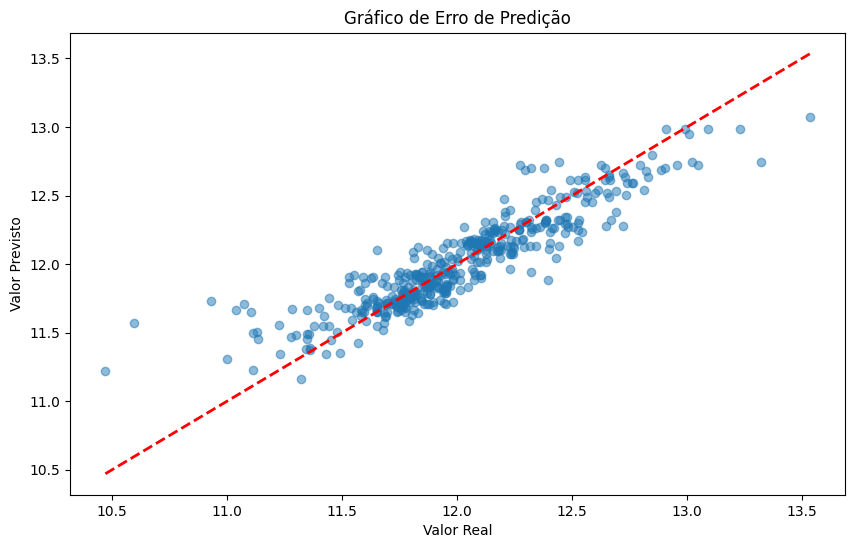

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_teste, previsao_rf, alpha=0.5)
plt.plot([min(y_teste), max(y_teste)], [min(y_teste), max(y_teste)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Valor Real')
plt.ylabel('Valor Previsto')
plt.title('Gráfico de Erro de Predição')
plt.show()

In [ ]:
#Métrica de desempenho (coeficiente de determinação - r2)

r2_rf = r2_score(y_teste, previsao_rf)
r2_rf

0.82130929800881


# Otimizando Random Forest

In [ ]:
# Divisão do dataset em 3 pedaços
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

# Definindo o K - número de subconjuntos
cv = KFold(n_splits = 5, shuffle=True)

In [ ]:
# Cross validation
desempenhoRF_cross_val_r2 = cross_val_score(estimator = rf,
                                       X = X_treino,
                                       y = y_treino,
                                       scoring = 'r2',
                                       cv = cv)
print('Desempenho médio de r2: {}'.format(round(desempenhoRF_cross_val_r2.mean(), 3)))

Desempenho médio de r2: 0.768


In [ ]:
#Random search na validação (seleção de hiperparâmetros)
param_random_rf = {
    'n_estimators': [150, 160, 170, 175],
    'max_depth': [None, 18, 20, 22],
    'min_samples_split': [6, 7, 8],
    'min_samples_leaf': [0.01, 0.2, 0.3, 0.5, 1],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False],
}

In [ ]:
random_cv_rf = RandomizedSearchCV(
    rf,
    param_random_rf,
    n_iter=5,
    cv=cv,
    scoring='r2',
    n_jobs=-1,
    random_state = 42
)

In [ ]:
rf_randomcv = random_cv_rf.fit(X_treino, y_treino)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [ ]:
pd.DataFrame(rf_randomcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.375146,0.015459,0.016285,0.003746,170,7,0.5,sqrt,None,True,"{'n_estimators': 170, 'min_samples_split': 7, ...",-0.000083,-0.011905,-0.000946,-0.000004,-0.006553,-0.003898,0.004682,4
1,0.477052,0.105749,0.019159,0.005466,175,6,0.2,sqrt,22,True,"{'n_estimators': 175, 'min_samples_split': 6, ...",0.253844,0.234834,0.252915,0.271548,0.264306,0.255489,0.012422,3
2,0.868860,0.058385,0.026347,0.001728,150,8,0.2,auto,22,False,"{'n_estimators': 150, 'min_samples_split': 8, ...",0.543159,0.510446,0.530756,0.449892,0.579103,0.522671,0.042699,1
3,0.881057,0.072300,0.024013,0.008276,170,7,0.3,auto,20,True,"{'n_estimators': 170, 'min_samples_split': 7, ...",0.353395,0.388526,0.488015,0.356706,0.421849,0.401698,0.049775,2
4,0.351179,0.028892,0.014294,0.002608,170,8,0.5,sqrt,None,True,"{'n_estimators': 170, 'min_samples_split': 8, ...",-0.000083,-0.011905,-0.000946,-0.000004,-0.006553,-0.003898,0.004682,4


In [ ]:
rf_randomcv.best_params_

{'n_estimators': 150,
 'min_samples_split': 8,
 'min_samples_leaf': 0.2,
 'max_features': 'auto',
 'max_depth': 22,
 'bootstrap': False}

In [ ]:
rf_randomcv.best_score_

0.5226710181838848

In [ ]:
# Random search teste

In [ ]:
rf_otimizado = RandomForestRegressor(random_state=42, n_estimators=150, min_samples_split=7,
                                    min_samples_leaf=1, max_features='sqrt', max_depth=20)

In [ ]:
rf_otimizado.fit(X_treino, y_treino)

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_split=7,
                      n_estimators=150, random_state=42)

In [ ]:
predicao_rf_otimizado = rf_otimizado.predict(X_teste)

In [ ]:
r2_score(y_teste, predicao_rf_otimizado)

0.8705894745725972

In [ ]:
import pickle

In [ ]:
with open('rf_otimizado.pkl', 'wb') as arquivo:
    pickle.dump(rf_otimizado, arquivo)

# Previsão Catboost


In [ ]:
pip install catboost

In [ ]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [ ]:
cb = CatBoostRegressor(loss_function='RMSE', random_seed=42, verbose=False)

In [ ]:
cb.fit(X_treino, y_treino)

In [ ]:
previsao_cb = cb.predict(X_teste)

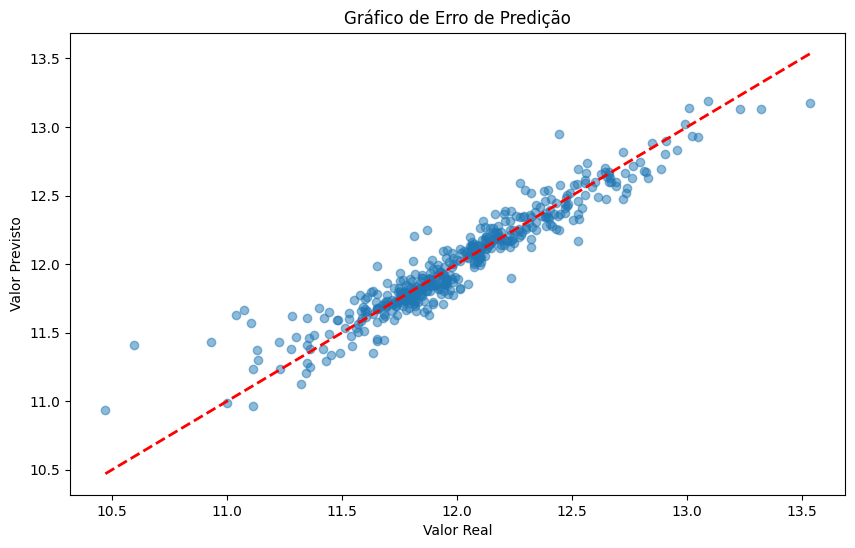

In [ ]:
#Gráfico de erro de predição

plt.figure(figsize=(10, 6))
plt.scatter(y_teste, previsao_cb, alpha=0.5)
plt.plot([min(y_teste), max(y_teste)], [min(y_teste), max(y_teste)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Valor Real')
plt.ylabel('Valor Previsto')
plt.title('Gráfico de Erro de Predição')
plt.show()

In [ ]:
#Métrica de desempenho (coeficiente de determinação - r2)

r2_cb = r2_score(y_teste, previsao_cb)
r2_cb

0.9015140663506541

# Otimizando CatBoost

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
#Cross validation
desempenho_cross_val_r2 = cross_val_score(estimator = cb,
                                       X = X_treino,
                                       y = y_treino,
                                       scoring = 'r2',
                                       cv = cv)
print('Desempenho médio de r2: {}'.format(round(desempenho_cross_val_r2.mean(), 3)))

Desempenho médio de r2: 0.861


In [ ]:
#Random search na validação (seleção de hiperparâmetros)
param_random_cb = {
   'depth': [6, 7, 8],
    'iterations': [780, 830, 880],
    'learning_rate': [0.02, 0.03, 0.04],
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
random_cv_cb = RandomizedSearchCV(
    cb,
    param_random_cb,
    n_iter=5,
    cv=cv,
    scoring='r2',
    n_jobs=-1
)


In [ ]:
randomcv_cb = random_cv_cb.fit(X_treino, y_treino)

In [ ]:
pd.DataFrame(randomcv_cb.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_iterations,param_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.907827,0.586863,0.009281,0.003533,0.02,880,6,"{'learning_rate': 0.02, 'iterations': 880, 'de...",0.867004,0.864180,0.860586,0.899950,0.852435,0.868831,0.016311,5
1,5.144113,1.217970,0.007437,0.002640,0.03,830,7,"{'learning_rate': 0.03, 'iterations': 830, 'de...",0.865416,0.866889,0.866566,0.899092,0.860713,0.871735,0.013857,2
2,2.651974,0.191076,0.007573,0.003240,0.03,780,6,"{'learning_rate': 0.03, 'iterations': 780, 'de...",0.871660,0.866657,0.866098,0.900641,0.854468,0.871905,0.015435,1
3,6.326984,0.670246,0.010518,0.004574,0.04,880,7,"{'learning_rate': 0.04, 'iterations': 880, 'de...",0.865770,0.865550,0.862266,0.900727,0.855352,0.869933,0.015851,4
4,5.167163,1.479675,0.009126,0.004685,0.03,880,7,"{'learning_rate': 0.03, 'iterations': 880, 'de...",0.865181,0.866983,0.866666,0.899002,0.860670,0.871701,0.013836,3


In [ ]:
#a melhor combinação
randomcv_cb.best_params_

{'learning_rate': 0.03, 'iterations': 780, 'depth': 6}

In [ ]:
#o melhor score
randomcv_cb.best_score_

0.8719046886130213

In [ ]:
#RANDOM SEARCH TESTE

cb_otimizado = CatBoostRegressor(
    loss_function='RMSE',
    depth=7,
    iterations=830,
    learning_rate=0.03,
    random_seed=42
)

In [ ]:
cb_otimizado.fit(X_treino, y_treino)


0:	learn: 0.3865138	total: 11.6ms	remaining: 9.59s
1:	learn: 0.3791052	total: 21ms	remaining: 8.68s
2:	learn: 0.3724799	total: 27.4ms	remaining: 7.56s
3:	learn: 0.3662317	total: 32ms	remaining: 6.61s
4:	learn: 0.3597881	total: 38.2ms	remaining: 6.3s
5:	learn: 0.3537288	total: 44.2ms	remaining: 6.07s
6:	learn: 0.3478086	total: 48.1ms	remaining: 5.66s
7:	learn: 0.3419950	total: 55.1ms	remaining: 5.66s
8:	learn: 0.3363309	total: 61.6ms	remaining: 5.62s
9:	learn: 0.3305145	total: 67.4ms	remaining: 5.53s
10:	learn: 0.3253615	total: 74ms	remaining: 5.51s
11:	learn: 0.3200188	total: 80.3ms	remaining: 5.47s
12:	learn: 0.3151646	total: 86.9ms	remaining: 5.46s
13:	learn: 0.3100226	total: 93.4ms	remaining: 5.44s
14:	learn: 0.3052898	total: 100ms	remaining: 5.44s
15:	learn: 0.3013699	total: 102ms	remaining: 5.18s
16:	learn: 0.2968380	total: 105ms	remaining: 5.04s
17:	learn: 0.2923907	total: 109ms	remaining: 4.91s
18:	learn: 0.2883778	total: 115ms	remaining: 4.91s
19:	learn: 0.2841848	total: 120ms	

In [ ]:
predicao_cb_otimizado = cb_otimizado.predict(X_teste)

In [ ]:
r2_score(y_teste, predicao_cb_otimizado)

0.9022685079178541

In [ ]:
cb_otimizado.save_model('cb_modelo.cbm')

# Linha Teste (preço de acordo com o dataset do Kaggle: 175053.355553278

In [ ]:
imovelteste = pd.DataFrame({
    'Id': [0],
    'tipo_moradia': ['Densidade Residencial Alta'],
    'localizacao': ['NAmes'],
    'andares': [1],
    'nota_casa': [5],
    'ano_contrucao': [1997],
    'vagas_garagem': [2],
    'cozinhas': [1],
    'banheiros': [3],
    'tamanho(em pés quadrados)': [1337],
    'tamanho lote': [10943],
})

In [ ]:
imovelteste.head()

,Id,tipo_moradia,localizacao,andares,nota_casa,ano_contrucao,vagas_garagem,cozinhas,banheiros,tamanho(em pés quadrados),tamanho lote
0,0,Densidade Residencial Alta,NAmes,1,5,1997,2,1,3,1337,10943


In [ ]:
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p, validate=True)
dados_transformados_teste = transformer.transform(imovelteste.select_dtypes(exclude=['object']))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


In [ ]:
colunas_dados_transformados_teste = imovelteste.select_dtypes(exclude=['object']).columns

df_transformado_teste = pd.concat([imovelteste.select_dtypes(include=['object']), pd.DataFrame(dados_transformados_teste, columns=colunas_dados_transformados_teste)], axis=1)
df_transformado_teste.head()

,tipo_moradia,localizacao,Id,andares,nota_casa,ano_contrucao,vagas_garagem,cozinhas,banheiros,tamanho(em pés quadrados),tamanho lote
0,Densidade Residencial Alta,NAmes,0.0,0.693147,1.791759,7.599902,1.098612,0.693147,1.386294,7.198931,9.300547


In [ ]:
variaveis_categoricas_prev_teste = df_transformado_teste.select_dtypes(include=['object']).columns

In [ ]:
variaveis_categoricas_prev_teste

Index(['tipo_moradia', 'localizacao'], dtype='object')

In [ ]:
prev_teste_dummies = pd.get_dummies(imovelteste[variaveis_categoricas_prev_teste])
prev_teste_dummies.head()

,tipo_moradia_Densidade Residencial Alta,localizacao_NAmes
0,1,1


In [ ]:
prev_dummies_teste = pd.concat([df_transformado_teste.drop(variaveis_categoricas_prev_teste, axis=1), df_dummies], axis=1)
prev_dummies_teste.head()

,Id,andares,nota_casa,ano_contrucao,vagas_garagem,cozinhas,banheiros,tamanho(em pés quadrados),tamanho lote,tipo_moradia_C (all),...,localizacao_Northridge Heights,localizacao_Northwest Ames,localizacao_Old Town,localizacao_Sawyer,localizacao_Sawyer West,localizacao_Somerset,localizacao_South & West of Iowa State University,localizacao_Stone Brook,localizacao_Timberland,localizacao_Veenker
0,0.0,0.693147,1.791759,7.599902,1.098612,0.693147,1.386294,7.198931,9.300547,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,1
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
prev_dummies_teste = prev_dummies_teste.dropna()
prev_dummies_teste.head()

,Id,andares,nota_casa,ano_contrucao,vagas_garagem,cozinhas,banheiros,tamanho(em pés quadrados),tamanho lote,tipo_moradia_C (all),...,localizacao_Northridge Heights,localizacao_Northwest Ames,localizacao_Old Town,localizacao_Sawyer,localizacao_Sawyer West,localizacao_Somerset,localizacao_South & West of Iowa State University,localizacao_Stone Brook,localizacao_Timberland,localizacao_Veenker
0,0.0,0.693147,1.791759,7.599902,1.098612,0.693147,1.386294,7.198931,9.300547,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dados_teste = prev_dummies_teste

# Linha predição (os valores das features estão nos slides, foram escolhidas aleatoriamente)

In [ ]:
imovelpred = pd.DataFrame({
    'Id': [0],
    'tipo_moradia': ['Densidade Residencial Média'],
    'localizacao': ['Veenker'],
    'andares': [2],
    'nota_casa': [8],
    'ano_contrucao': [1990],
    'vagas_garagem': [2],
    'cozinhas': [2],
    'banheiros': [5],
    'tamanho(em pés quadrados)': [450],
    'tamanho lote': [800],
})

In [ ]:
imovelpred.head()

,Id,tipo_moradia,localizacao,andares,nota_casa,ano_contrucao,vagas_garagem,cozinhas,banheiros,tamanho(em pés quadrados),tamanho lote
0,0,Densidade Residencial Média,Veenker,2,8,1990,2,2,5,450,800


In [ ]:
from sklearn.preprocessing import FunctionTransformer

transformer_pred = FunctionTransformer(np.log1p, validate=True)
dados_transformados_pred = transformer_pred.transform(imovelpred.select_dtypes(exclude=['object']))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


In [ ]:
colunas_dados_transformados_pred = imovelpred.select_dtypes(exclude=['object']).columns

df_transformado_pred = pd.concat([imovelpred.select_dtypes(include=['object']), pd.DataFrame(dados_transformados_pred, columns=colunas_dados_transformados_pred)], axis=1)
df_transformado_pred.head()

,tipo_moradia,localizacao,Id,andares,nota_casa,ano_contrucao,vagas_garagem,cozinhas,banheiros,tamanho(em pés quadrados),tamanho lote
0,Densidade Residencial Média,Veenker,0.0,1.098612,2.197225,7.596392,1.098612,1.098612,1.791759,6.111467,6.685861


In [ ]:
variaveis_categoricas_pred = df_transformado_pred.select_dtypes(include=['object']).columns

In [ ]:
variaveis_categoricas_pred

Index(['tipo_moradia', 'localizacao'], dtype='object')

In [ ]:
prev_dummies_pred = pd.get_dummies(imovelpred[variaveis_categoricas_pred])
prev_dummies_pred.head()

,tipo_moradia_Densidade Residencial Média,localizacao_Veenker
0,1,1


In [ ]:
prev_dummies_pred= pd.concat([df_transformado_pred.drop(variaveis_categoricas_pred, axis=1), df_dummies], axis=1)
prev_dummies_pred.head()

,Id,andares,nota_casa,ano_contrucao,vagas_garagem,cozinhas,banheiros,tamanho(em pés quadrados),tamanho lote,tipo_moradia_C (all),...,localizacao_Northridge Heights,localizacao_Northwest Ames,localizacao_Old Town,localizacao_Sawyer,localizacao_Sawyer West,localizacao_Somerset,localizacao_South & West of Iowa State University,localizacao_Stone Brook,localizacao_Timberland,localizacao_Veenker
0,0.0,1.098612,2.197225,7.596392,1.098612,1.098612,1.791759,6.111467,6.685861,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,1
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
prev_dummies_pred = prev_dummies_pred.dropna()
prev_dummies_pred.head()

,Id,andares,nota_casa,ano_contrucao,vagas_garagem,cozinhas,banheiros,tamanho(em pés quadrados),tamanho lote,tipo_moradia_C (all),...,localizacao_Northridge Heights,localizacao_Northwest Ames,localizacao_Old Town,localizacao_Sawyer,localizacao_Sawyer West,localizacao_Somerset,localizacao_South & West of Iowa State University,localizacao_Stone Brook,localizacao_Timberland,localizacao_Veenker
0,0.0,1.098612,2.197225,7.596392,1.098612,1.098612,1.791759,6.111467,6.685861,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dados_pred = prev_dummies_pred

# Previsão apresentação

In [ ]:
# Carregando o modelo random forest otimizado
with open('rf_otimizado.pkl', 'rb') as arquivo:
    randomforest_otimizado = pickle.load(arquivo)

In [ ]:
# Carregando o modelo catboost otimizado
catboost_otimizado = CatBoostRegressor()
catboost_otimizado.load_model('cb_modelo.cbm')

In [ ]:
# Usando a linha de teste com random forest

previsao_rf_teste = randomforest_otimizado.predict(dados_teste)
previsao_rf_teste = np.expm1(previsao_rf_teste)
print("Previsão de preço na linha teste usando random forest:", previsao_rf_teste)

Previsão de preço na linha teste usando random forest: [185880.69132062]


In [ ]:
# Usando a linha de teste com catboost

previsao_cb_teste = catboost_otimizado.predict(dados_teste)
previsao_cb_teste = np.expm1(previsao_cb_teste)
print("Previsão de preço na linha teste usando catboost:", previsao_cb_teste)

Previsão de preço na linha teste usando catboost: [185389.90282991]


In [ ]:
# Usando a linha que desejamos descobrir com random forest

previsao_rf_pred = previsao_rf_teste = randomforest_otimizado.predict(dados_pred)
previsao_rf_pred = np.expm1(previsao_rf_pred)
print("Previsão de preço na linha que desejamos descobrir usando random forest:", previsao_rf_pred)

Previsão de preço na linha que desejamos descobrir usando random forest: [156471.26457715]


In [ ]:
# Usando a linha que desejamos descobrir com catboost

previsao_cb_pred = catboost_otimizado.predict(dados_pred)
previsao_cb_pred = np.expm1(previsao_cb_pred)
print("Previsão de preço na linha que desejamos descobrir usando catboost:", previsao_cb_pred)

Previsão de preço na linha que desejamos descobrir usando catboost: [147766.26267013]
